#Thinking1 既然内容相似度计算简单，能频繁更新，为什么还需要协同过滤算法呢？
答：内容相似度计算会导致推荐结果种类单一，导致用户接触到的信息种类越来约窄。

#Thinking2 你需要推荐系统么？哪些情况下不需要推荐系统？
答：使用类似于微博，淘宝这种海量信息的应用，需要通过推荐系统来减少我的购物或者获取信息的时间成本，但是对于一些功能比较单一，我使用目的非常明确的app则不需要推荐系统，例如遥控精灵，我使用它只是为了匹配我需要遥控的空调品牌和类型，不需要推荐系统。

#Thinking3 如果给一个视频打标签，视频中有音乐作为背景音乐，采用了NLP方式对内容自动打标签，可能存在什么问题？
答：背景音乐歌词内容与视频本身的内容可能并没有强相关性，直接使用NLP对背景音乐进行打标签可能将视频分类到错误的类别中，让推荐的内容变得混乱

Action1
针对mnist数据集进行分类，采用CART决策树（工具使用sklearn中的CART）

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0
深度: 5.0000
CART准确率: 0.6644
深度: 6.0000
CART准确率: 0.7756
深度: 7.0000
CART准确率: 0.8356
深度: 8.0000
CART准确率: 0.8422
深度: 9.0000
CART准确率: 0.8533
深度: 10.0000
CART准确率: 0.8578
深度: 11.0000
CART准确率: 0.8467
深度: 12.0000
CART准确率: 0.8600
深度: 13.0000
CART准确率: 0.8489
深度: 14.0000
CART准确率: 0.8622
深度: 15.0000
CART准确率: 0.8467
深度: 16.0000
CART准确率: 0.8556
深度: 17.0000
CART准确率: 0.8533
深度: 18.0000
CART准确率: 0.8400
深度: 19.0000
CART准确率: 0.8511
深度: 20.0000
CART准确率: 0.8444
深度: 21.0000
CART准确率: 0.8400
深度: 22.0000
CART准确率: 0.8511
深度: 23.0000
CART准确率: 0.8400
深度: 24.0000
CART准确率: 0.8622
深度: 25.0000
CART准确率: 0.8533
————不同的深度值对应的准确率————


Text(0, 0.5, 'accuracy')

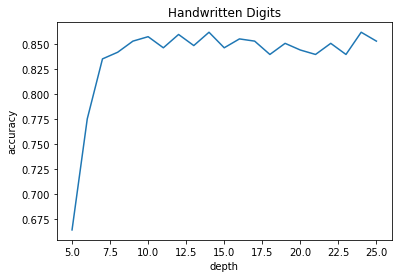

In [9]:
# -*- coding: utf-8 -*-
# 使用LR进行MNIST手写数字分类
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import string
from sklearn.datasets import load_digits
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# 加载数据
digits = load_digits()
data = digits.data




# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.title('Handwritten Digits')
#plt.imshow(digits.images[0])
#plt.show()

# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

# 创建CART分类器

yy=[]
for depth in range(5,26):
    clf=DecisionTreeClassifier(max_depth=depth);
    clf.fit(train_ss_x, train_y)
    predict_y=clf.predict(test_ss_x)
    a=accuracy_score(predict_y, test_y)
    yy.append(a)

    print('深度: %0.4lf' %depth)
    print('CART准确率: %0.4lf' % a)    
    
print('————不同的深度值对应的准确率————')
xx=range(5,26)
plt.plot(xx,yy)
plt.xlabel('depth')
plt.ylabel('accuracy')

    
    



